# Регрессия

В случае задач машинного обучения с учителем существует какое-то количество размеченных данных, то есть данных, для которых определен корректный ответ и корректное предсказание. Мы пытаемся обучить нашу модель на этих данных и потом сделать предсказание на новых данных, которых мы еще “не видели”. Далее когда поступают новые данные, не размеченные, наша обученная модель пытается предсказать для них ответ.

В этом разделе мы посмотрим на одну из задач машинного обучения с учителем - задачу регрессии.

Задачи регрессии широко применяются в таких областях, как экономика, физика, медицина, маркетинг, прогнозирование и многих других.

Примеры задач регресии:
- Оценка стоимости недвижимости: по характеристике
района, экологической обстановке, транспортной
связности оценить стоимость жилья
- Прогноз свойств соединений: по параметрам
химических элементов спрогнозировать температуру
плавления, электропроводность, теплоемкость
получаемого соединения
- Медицина: по постоперационным показателям оценить
время заживления органа
- Кредитный скоринг: по анкете заемщика оценить
величину кредитного лимита
- Инженерное дело: по техническим характеристикам
автомобиля и режиму езды спрогнозировать расход
топлива

**Ответ в задачах регресии является числовым из непрерывного диапазона, в отличии от задач классификации, где ответ дискретный.**

## Теоретические основания

**Определение**

Задача регрессии (прогнозирования) – построение модели, способной предсказывать численную величину (целевую переменную) на основе набора признаков объекта.

Математически задачу регрессии можно сформулировать следующим образом: $y = f(x_1, x_2, \dots, x_n)$, где:
- $y \in \mathbb{R}$ — целевая переменная, значение которую необходимо предсказать
- $x_1, x_2, \dots, x_n$ — признаки, по которым делается предсказание (входные данные)
- $f(x_1, x_2, \dots, x_n)$ — функция, описывающая зависимость между признаками и целевой переменной (модель)

Целью задачи регрессии является нахождение функции $f$, которая будет наилучшим образом приближать зависимость между признаками и целевой переменной.


Существует несколько типов задач регрессии, в зависимости от структуры данных и желаемого результата:
- Линейная регрессия
- Полиномиальная регрессия
- Множественная регрессия
- Регрессия с регуляризацией
- Нелинейная регрессия

Центральным понятием машинного обучения является обучающая выборк. Это примеры, на основе которых планируется строить общую закономерность. Она состоит из $m$ пар объектов $x_{i}$ и известных ответов $y_{i}$: $(x_{i}, y_{i})^m_{i=1}$.

Функция, отображающая пространство объектов $\mathbb{X}$ в пространство ответов $\mathbb{Y}$, позволяющая делать предсказания, называется алгоритмом или моделью и обозначается $f(x)$. Она принимает на вход объект и выдает ответ.

Самый простой способ рассчитать регрессию, предположить, что есть некая линейная зависимость целевой переменной от признаков. Математически линейная регрессия представляется как (это и есть базовая модель линейной регрессии):

$f_{w,b}(x) = w_1*x_1 + w_2*x_2 + \dots + w_n*x_n + b$, где

- $x_i$ - один из признаков
- $w_i$ - коэффициент уравнения, отражающий важность - $i$-го признака или с геометрической точки зрения определяющие наклон прямой
- $b$ - свободный член (пересечение с осью $y$)
- $n$ - количество признаков

Чтобы сделать модель однородной и упростить оптимизацию иногда вводится фиктивный признак $x_{0}$ всегда равный единице. Таким образом:

$$f_{w} (x) = \left \langle w,x \right \rangle = \sum^{n}_{i=0}w_{i}x_{i} $$


Проще говоря в линейной регрессии - результатом работы алгоритма, т.е. моделью, является некоторая прямая, плоскость или гиперплоскость, которая аппроксимирует наши данные. И по сути, задача линейной регрессии заключается в нахождении оптимальных коэффициентов $w_1, w_2, \dots, w_n, b$​, которые минимизируют ошибку на обучающем наборе данных и наилучшим образом описывают наши данные.

In [ ]:
y = kx + b

y_true    x
1.4      0.5
1.5      1.5
2.4      5.5
0.4      -5

1.4 = k*0.5 + b
....

k = 5.1
b = 0.6

y_pred = 5.1*x + 0.6

loss_function = |y_true - y_pred|
((1_pred-1_true) + |2_pred-2_true| + |3_pred-3_true|)/3

## Функционал ошибки

Для обучения модели и сравнения различных моделей между собой необходимо разработать математическую формулу и алгоритм расчёта ошибки модели. В рамках решения задачи оптимизации обычно ставится задача достижения минимального значения функционала ошибки.

В качестве очевидного решения можно предложить такую формулу, т.е. считать разницу между предсказанным ответов и изначально правильным:
$$Q(f(x),y)=f(x)-y$$.

**Однако, у неё есть принципиальная проблема: у такой функции не существует минимума.**

С учетом этого, логичным кажется решение использовать в качестве функции для расчёта ошибки модуль отклонения $Q(f(x),y)=|f(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(f(x),x) = MAE = \frac{1}{m}\sum^{m}_{i=1}|f(x_{i})-y_{i}|.$$

Однако, мы уже разбирали, что функционал ошибки или функция потерь, должны быть дифференцируемы, а значит, необходимо предложить другой вариант базовой функции для расчёта ошибки: $Q(f(x),y)=(f(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $f(x)$.

Основанный на этой функции функционал ошибки называется среднеквадратичным отклонением (mean squared error, MSE):

$$Q(f(x),x) = MSE = \frac{1}{m}\sum^{m}_{i=1}(f(x_{i})-y_{i})^{2}.$$


## Вывод аналитической формулы для решения линейной регрессии

Таким образом, задача расчёт оптимальных коэффициентов математически может быть записана следующим образом.

$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2} \rightarrow \underset{w}{\text{min}}.$$

Если вас смущает возникшая, казалось бы путаница, между различными записями, то целесообразно ввести матричную запись признаков:

$$X = \begin{pmatrix}
x_{11} & ... & x_{1d}\\
... & ... & ...\\
x_{l1} & ... & x_{ld}
\end{pmatrix},$$

$$y = \begin{pmatrix}
y_{1}\\
...\\
y_{l}
\end{pmatrix}.$$

Таким образом, задача начинает выглядеть следующим образом

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}},$$

Взяв производную (от матрицы (!)) и прировняв её к нулю (точка экструма квадратинчной функции) можно получить значения коэффициентов:

$$w = (X^{T}X)^{-1}X^{T}y.$$

Если вам интересна более детальная математическая подоплёка смотрите её тут: [Вывод аналитической формулы решения уравнения линейной регрессии](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) (см. пункт 1.2)

**Таким образом, нетрудно догадаться, что в идеальном случае MAE и MSE будут равны 0.**

Коэффициент детерминации $R2$, или $R-квадрат$, варьируется в интервале между 0 и 1 и обозначает объяснительную мощность линейной регрессионной модели. Он вычисляет объясненную долю изменчивости в зависимой переменной. (или если по-простому, $R2$ показывают насколько признаки влияют/коррелируют с ответом).

Обычно, чем ближе $R2$ к 1, тем лучше линия регрессии подогнана к точкам данных и больше изменчивости в $Y$ объясняется независимой переменной $X$.

*P.s. $R2$ может быть и отрицательным, это значит ваша модель работает хуже, чем простое усреднение результата.*

## Пример самой простой линейной регрессии

Предположим, нам задан набор из 7 точек (таблица ниже).

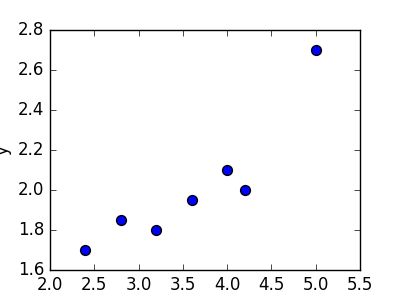

**Цель линейной регрессии** — поиск линии, которая наилучшим образом соответствует этим точкам.

Общее уравнение для прямой (в том случае если у нас один признак для каждого объекта):

 $\\ f (x) = w_1*x + w_0 $,

где $\\ w_1 $ — наклон линии, а $\\ w_0 $ — его y-сдвиг. Таким образом, решение линейной регрессии определяет значения для $\\ w_1 $ и $\\ w_0 $, так что f (x) приближается как можно ближе к y.

Попробуем несколько случайных кандидатов:

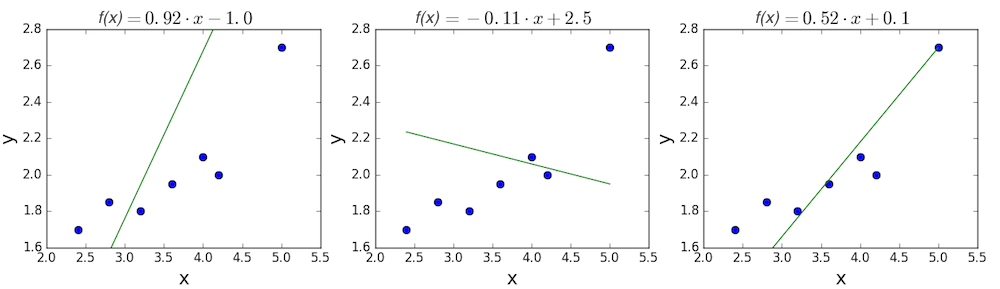

**Как расчитываются метрики**

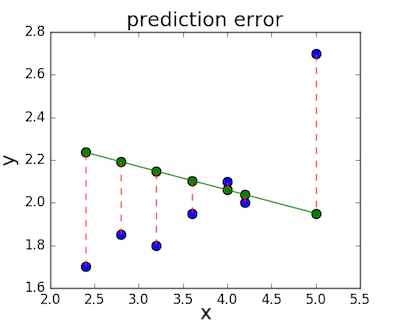

- зеленые точки - это $\\ \bar{y_t}$ - предсказание
- синие точки - это $\\ y_t $ - правильный ответ
- T = 7 - это общее число наблюдений (точек).

Вычислим MSE для каждой из трех функций выше:
- первая функция дает **MSE = 0,17**
- вторая **MSE = 0,08**
- третья **MSE = 0,02**

Неудивительно, что третья функция имеет самую низкую MSE, подтверждая нашу догадку, что это линия наилучшего соответствия.
В идеальном случае, когда все ответы предсказаны точно, MSE будет равна **нулю**.

## Практика

Построим простую модель линейной регрессии.

### Загрузка библиотке и создание данных

In [ ]:
import numpy as np
import pandas as pd
# импортируем необходмимые библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

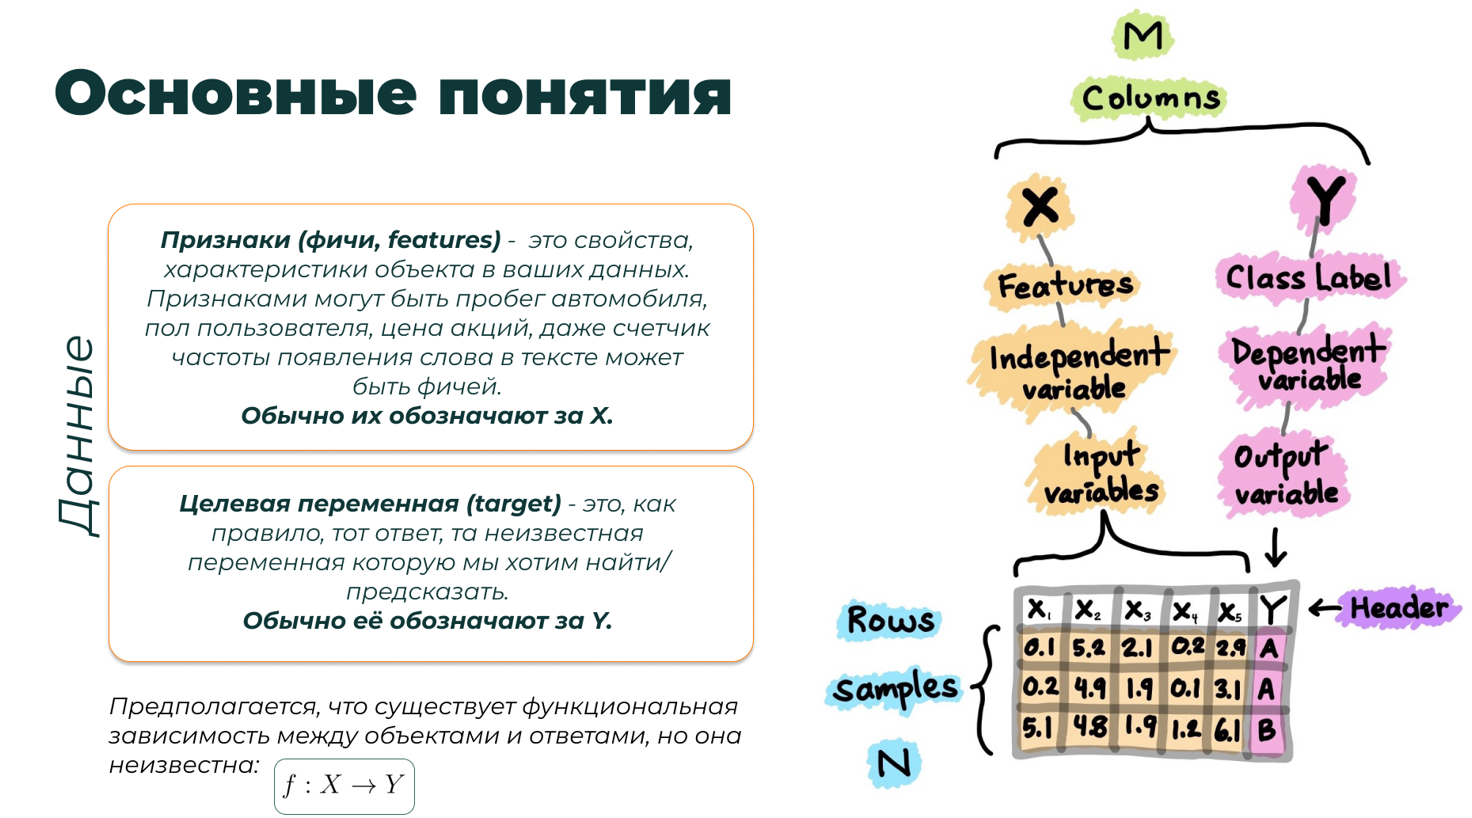

Ссылка на данные: https://drive.google.com/file/d/1wSE2AXsggLOBVq4QTT-u0ecFjKD5B2gl/view

In [ ]:
df = pd.read_csv("salary_data.csv")

df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
# выделим вектор признаков
X = df.iloc[:,:-1].values
# вектор целевой переменной
Y = df.iloc[:,1].values

Y # Y - одномерный вектор

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [ ]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

### Разделение данных

Одна из целей построения алгоритмов машинного обучения, постоить такую модель, которая будет способная также хорошо работать с новыми данными, которых она не видела до этого, как и с теми данными на которых обучалась.

Это называется **обобщающей способностью** моделей.

**Обобщающая способность** — это способность аналитической модели, построенной на основе машинного обучения (нейронной сети, дерева решений, карты Кохонена и др.) выдавать правильные результаты не только для примеров, участвовавших в процессе обучения, но и для любых новых, которые не участвовали в нем.

Именно поэтому при обучении модели, существующий набор данных разделяют на подвыборки:
- **тренировочную (train)** - набор данных на которых мы обучаем нашу модель
- **тестовую (test)** - это набор данных, которые мы не использовали для обучения нашей модели, т. е. это данные которые не видела наша модель. Набор данных используется для тестирования и оценки модели.

***Таким образом разделение данных на обучающую и тестовую выборки позволяет имитировать работу модели на новых/неизвестных данных.***


К тому же при использовании одних и тех же данных может возникнуть **Переобучение** — это термин, используемый для описания того, когда модель изучила эту взаимосвязь «слишком хорошо» для обучающих данных.

Под «слишком хорошо» мы подразумеваем скорее то, что он слишком близко изучил взаимосвязь — что он видит больше тенденций/корреляций/связей, чем существует на самом деле.

**Существует две основных стратегий разделения данных на подвыборки:**
1. отложенная выборка: разделение данных на две части (train и test)
2. Кроссвалидация

**Отложенная выборка**

Данный подход эффективен при большом количестве данных, при маленьких размерах выборки может возникнуть множество различных проблем.

В библиотеки sklearn реализован метод позволяющий осуществить данное разбиение:

`from sklearn.model_selection import train_test_split`

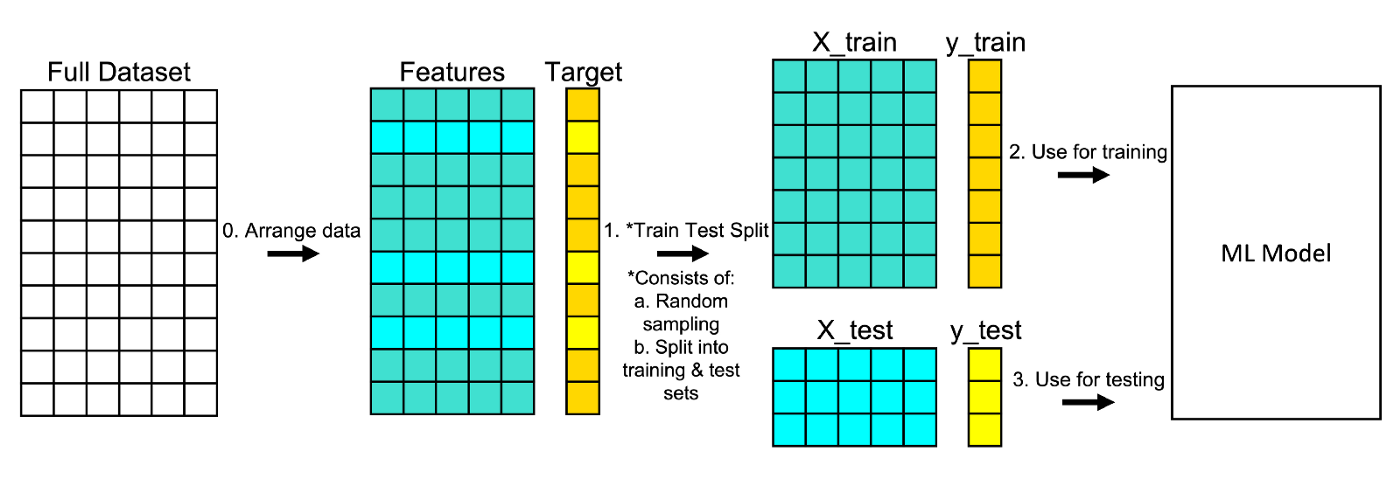

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (21, 1), (21,)
Test dataset size: (9, 1), (9,)


**Кроссвалидация**

Это метод, используемый для обучения и оценки модели машинного обучения с использованием нескольких частей набора данных. Это означает, что вместо того, чтобы разбивать набор данных только на две части, одну для обучения и другую для тестирования, набор данных делится на большее количество подвыборок.

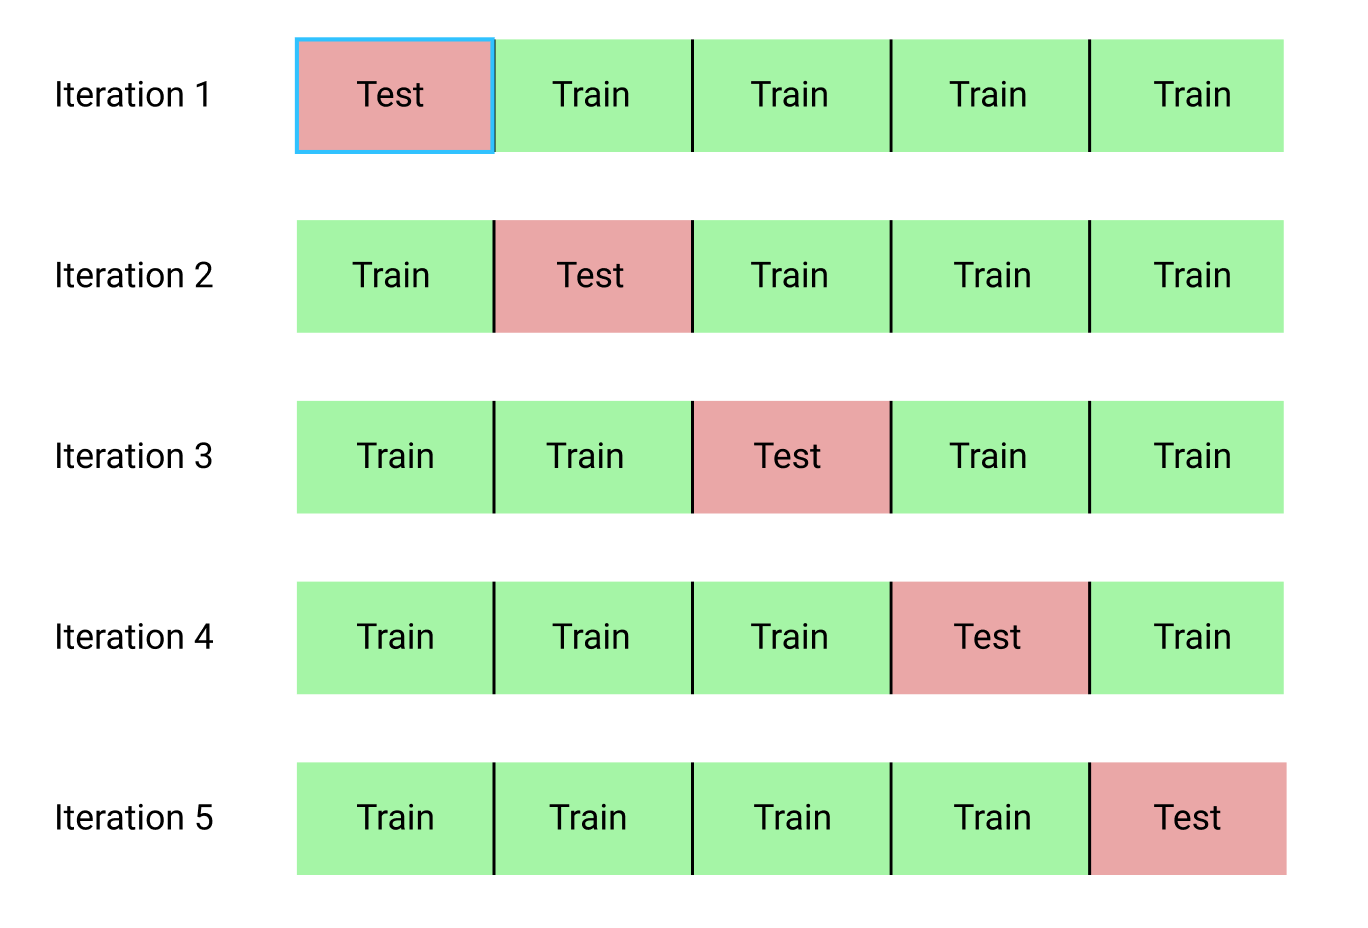

Выборка разбивается на k непересекающихся подмножеств, и каждое из них по очереди выступает в качестве контрольной выборки (а остальные k − 1 частей — в качестве обучающей выборки). В качестве результата выдается средняя ошибка по всем контрольным выборкам.

Значение k должно быть тщательно выбрано для выборки данных.

Плохо выбранное значение для k может привести к неправильному представлению о качестве модели, например, к оценке с высокой дисперсией (которая может сильно измениться на основе данных, используемых в соответствии с моделью), или к высокой предвзятости (например, переоценка качества модели).

k выбирают обычно 5 или 10, но нет формального правила. По мере того как k становится больше, разница в размере между тестовой выборкой и подмножествами resampling становится мала. По мере уменьшения этой разницы предвзятость к технике становится меньше.


**В библиотеки sklearn также реализован метод кросс валидации:**

```
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
```

Конструктор выглядит следующим образом:

`sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)`

где:
- estimator - модель машинного обучения
- X - вектор признаков
- y - вектор целевой переменной
- scoring - оценка модели
- cv - количество фолдов (подвыборок)

In [ ]:
from sklearn.model_selection import cross_val_score

### Визуализация данных

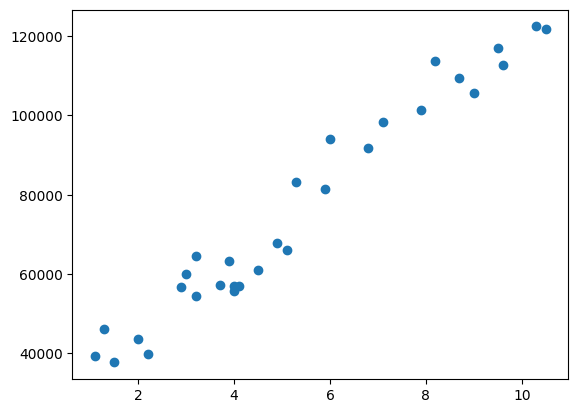

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X, Y)

plt.show()

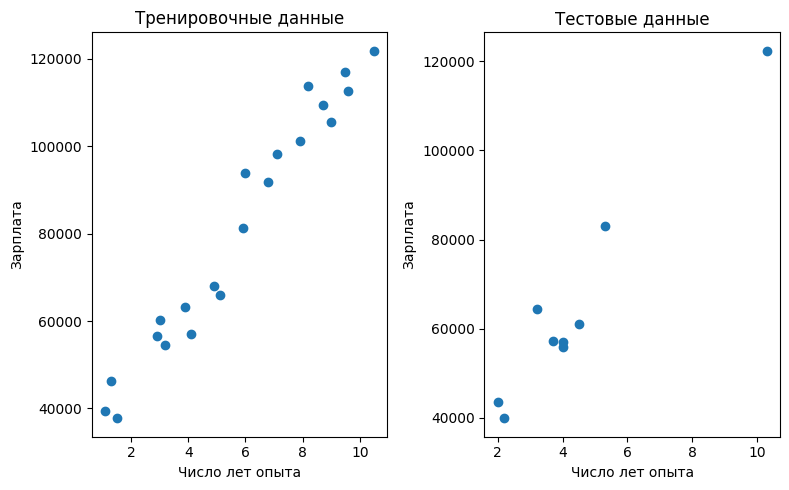

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2)

axes[0].scatter(X_train, y_train)
axes[1].scatter(X_test, y_test)

axes[0].set_title('Тренировочные данные')
axes[0].set_xlabel('Число лет опыта')
axes[0].set_ylabel('Зарплата')

axes[1].set_title('Тестовые данные')
axes[1].set_xlabel('Число лет опыта')
axes[1].set_ylabel('Зарплата')

fig.set_size_inches(8, 5)
plt.tight_layout()

plt.show()

### Создание и обучение модели

In [ ]:
# Создаем модель линейной регрессии - т.е. прямой которая будет проходить через наши точки
# Эта операция создаёт переменную model в качестве экземпляра LinearRegression

lig_reg = LinearRegression()

In [ ]:
lig_reg

LinearRegression()

In [ ]:
# С помощью метода fit() применяем нашу модель к нашему набору данных - обучем модель
# С помощью .fit() вычисляются оптимальные значение весов w₀ и w₁ и т.д,
# используя существующие вход и выход (x и y) в качестве аргументов.

lig_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
w0 = lig_reg.intercept_
w0

24425.23867486511

In [ ]:
w1 = lig_reg.coef_
w1

array([9798.92625591])

$$ y = w_{0} + w_{1}x $$
$$ y = 24425.24 + 9798.93*x $$

In [ ]:
print('Веса всех признаков (w1): ', lig_reg.coef_)
print('Свободный коэффицент уравнения w0:', lig_reg.intercept_)

Веса всех признаков (w1):  [9798.92625591]
Свободный коэффицент уравнения w0: 24425.23867486511


### Предсказание, оценка и визуализация результата

**Оценка моделей регрессии**

Оценка моделей регрессии — это важный этап в процессе разработки моделей машинного обучения, который позволяет понять, насколько хорошо модель аппроксимирует реальные данные. В отличие от задач классификации, где целью является предсказание категорий, в задачах регрессии мы предсказываем непрерывные значения. Оценка качества модели регрессии помогает нам измерить её точность, стабильность и способность обобщать на новые данные.

Для оценки качества модели регрессии существует несколько метрик, каждая из которых измеряет определенный аспект работы модели. Рассмотрим основные из них, с частью из них мы с вами уже знакомы:

**Среднеквадратичная ошибка (Mean Squared Error, MSE)**

Среднеквадратичная ошибка (MSE) — это одна из самых распространённых метрик для оценки моделей регрессии. Она измеряет среднее квадратичное отклонение предсказанных значений от истинных. Формула для $MSE$:

$$MSE=\frac{1}{m} \sum^{m}_{i=0} (y_i - \hat y_i)^2$$
где:
- $m$ — количество наблюдений в выборке,
- $y_i$ — истинные значения,
- $\hat y_i$​ — предсказанные значения.

$MSE$ чувствительна к выбросам, так как квадрат отклонений увеличивает влияние больших ошибок. Зато, как мы обсуждали ранее, она дифференцируема на всех пространстве значений.

**Средняя абсолютная ошибка (Mean Absolute Error, MAE)**

Средняя абсолютная ошибка (MAE) измеряет среднее абсолютное отклонение между предсказанными и реальными значениями. Это ещё одна важная метрика для оценки точности регрессионных моделей, особенно если важно минимизировать эффект выбросов. Формула для $MAE$:

$$MAE=\frac{1}{m} \sum^{m}_{i=0} |y_i - \hat y_i|$$

$MAE$ проще в интерпретации, так как она измеряет ошибку в тех же единицах, что и исходные данные, и не зависит от квадрата ошибок, как MSE, т.е. менее чувствительна к выбросам в данных.

Как нетрудно догадаться, в лучшем случае $MSE=0$ и $MAE=0$, в худшем могут достигать сколь угодно больших значений.

**Коэффициент детерминации**

Коэффициент детерминации, или $R^2$, измеряет долю дисперсии целевой переменной, которую модель объясняет. Этот коэффициент варьируется от - бесконечности до $1$. Значение $R^2$ близкое к $1$ говорит о том, что модель хорошо объясняет данные, а значение близкое к $0$ указывает на то, что модель плохо объясняет данные.
Формула для $R^2$:
$$R^2=1 - \frac{\sum^{m}_{i=1} (y_i - \hat y_i)^2}{\sum^{m}_{i=0} (y_i - \overline y_i)^2}$$
где:
- $ \hat y_i $ — предсказанное значение,
- $y_i$ — истинное значение,
- $\overline y_i $​ — среднее значение целевой переменной.

Коэффициент $R^2$ говорит о том, сколько процентов изменчивости в данных объясняется моделью. Например, если $R^2=0.85$, это означает, что 85% изменчивости целевой переменной объясняется моделью.

Однако, стоит заметить, что $R^2$ может принимать и отрицательные значения. Как вы думаете, что это может значить?


Если коэффициент детерминации $R^2$ принимает отрицательные значения, это указывает на то, что модель регрессии работает хуже, чем тривиальная модель, которая просто предсказывает среднее значение целевой переменной для всех наблюдений.

Вы также можете убедиться, что $R^2=0$ в случае когда вы всегда предсказываете среднее значение.

In [ ]:
y_pred = lig_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 4242.9648406092
Mean Squared Error: 25641945.852404308
R2 score: 0.9577533944548223


*Если $R2<0$, то выходит, что  Это значит, что разработанная вами модель даёт прогноз даже хуже, чем простое усреднение.*

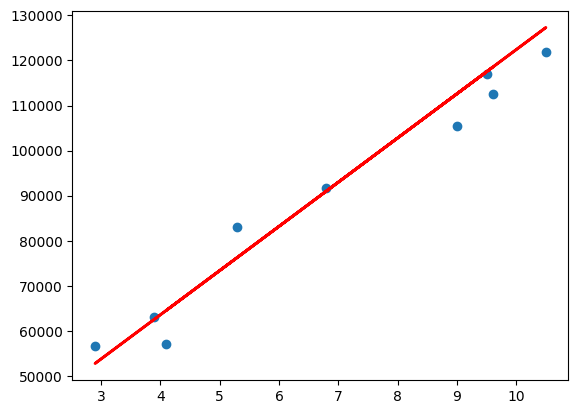

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2);
plt.show()

In [ ]:
# покажем что простое усреднение работает лучше

# X_train, X_test, y_train, y_test
val = y_test.mean()
y_pred = np.full(y_test.shape, val)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 22099.728395061727
Mean Squared Error: 606958725.3580247
R2 score: 0.0


In [ ]:
# пример с кросс валидацией

lig_reg = LinearRegression()

scores = cross_val_score(lig_reg, X, Y, cv=5, scoring='neg_mean_squared_error')
scores

array([-25905138.76967999, -30974669.99857574, -59780662.11837491,
       -68417038.21806611, -35766738.23965806])

In [ ]:
scores.mean()

-44168849.46887096

### Пример того, почему регрессия "Линейная"

In [ ]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]).reshape((-1, 1))
y = np.array([16, 9, 4, 1, 0, 1, 4, 9, 16])

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(x, y)

LinearRegression()

In [ ]:
y_pred = model1.predict(x)

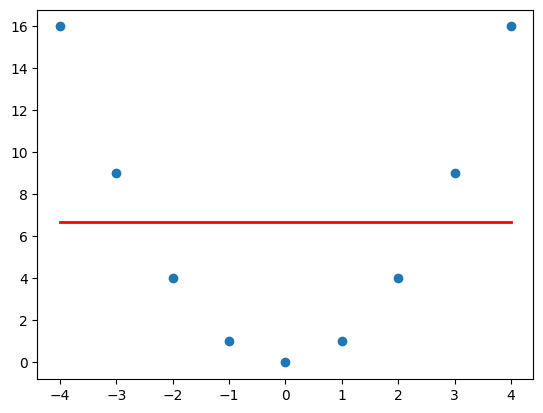

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);
plt.show()

### Ограничения линейной регрессии

1. Линейная связь : линейная регрессия требует, чтобы связь между независимыми и зависимыми переменными была линейной.
2. Выбросы: также важно проверять наличие выбросов, поскольку линейная регрессия чувствительна к наличию выбросов.
3. Независимость: Независимость предполагает, что независимые переменные в модели не коррелируют и не связаны друг с другом. Это предположение необходимо для того, чтобы линейная регрессия была верной.
4. Нет мультиколлинеарности: Мультиколлинеарность — еще одно слово, которое обманчиво прямолинейно. Он описывает статистическое явление, когда два или более предикторов в модели множественной регрессии сильно коррелируют друг с другом. Таким образом, предположение об отсутствии мультиколлинеарности утверждает, что не должно быть никакой связи между предикторами в модели множественной линейной регрессии. Почему нет? Потому что это может привести к нестабильному показателю взаимосвязи между предиктором и переменными выхода/отклика, что затруднит интерпретацию индивидуального влияния каждого предиктора на результат.